In [16]:
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

In [17]:
data = pd.read_csv('C:\\Users\\icosane\\Documents\\univ\\archive (2)\\apple_quality.csv')

#https://www.kaggle.com/datasets/zeesolver/apple-quality

In [18]:
data.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good


In [19]:
target = []
for i in data['Quality']:
  if i == 'good':
    target.append(0)
  if i == 'bad':
    target.append(1)
data['Target'] = target

In [20]:
data

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality,Target
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good,0
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good,0
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad,1
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good,0
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good,0
...,...,...,...,...,...,...,...,...,...,...
3995,3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,bad,1
3996,3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,good,0
3997,3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,bad,1
3998,3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,good,0


In [21]:
#разделим на набор признаков и данных

In [22]:
X = data.drop(columns=['A_id','Quality','Target'])
X.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984


In [23]:
y = data['Target'].values
y[0:5]

array([0, 0, 1, 0, 0], dtype=int64)

In [24]:
# 1.Формирование обучающей и тестовой выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
X_train

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
914,-3.699119,-1.922430,-1.971064,2.204418,0.115186,1.769828,-3.135861
186,-1.623600,1.667151,-1.004612,-0.173799,-2.276912,0.914227,2.056640
1956,-3.288756,0.065990,1.196369,2.313422,-1.005348,0.227669,2.503739
957,1.695873,-2.170523,-2.490740,1.009216,-1.022447,0.929089,-1.072149
386,-1.577720,-0.951959,-0.268934,-0.226795,2.031647,-0.612471,2.148967
...,...,...,...,...,...,...,...
3535,-0.604538,-0.646111,1.381263,1.281144,-2.171926,-1.473862,0.061930
3939,1.306863,-1.877131,2.142988,0.454001,0.946520,-2.379992,2.367434
3280,0.417919,-0.542236,-2.401747,5.909078,-2.659454,-1.804979,-0.811324
1074,-3.646452,-0.239611,-0.306738,-0.662168,-1.193714,2.504408,-0.625380


поскольку реализуется классификация качества яблока, то будем использовать логистическую регрессию используя библиотеку sklearn

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
cl1 = LogisticRegression()

In [27]:
cl1.fit(X_train, y_train)

LogisticRegression()

In [28]:
pred_y_test = cl1.predict(X_test)
pred_y_test

array([1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,

In [29]:
pred_y_test_proba = cl1.predict_proba(X_test)
pred_y_test_proba[:10]

array([[0.47320183, 0.52679817],
       [0.12957211, 0.87042789],
       [0.20709643, 0.79290357],
       [0.78909958, 0.21090042],
       [0.16936215, 0.83063785],
       [0.15834238, 0.84165762],
       [0.64009072, 0.35990928],
       [0.8299566 , 0.1700434 ],
       [0.86960955, 0.13039045],
       [0.7146046 , 0.2853954 ]])

In [30]:
# Вероятность принадлежности к 0 классу
[round(x, 4) for x in pred_y_test_proba[:10,0]]

[0.4732, 0.1296, 0.2071, 0.7891, 0.1694, 0.1583, 0.6401, 0.83, 0.8696, 0.7146]

In [31]:
# Вероятность принадлежности к 1 классу
[round(x, 4) for x in pred_y_test_proba[:10,1]]

[0.5268, 0.8704, 0.7929, 0.2109, 0.8306, 0.8417, 0.3599, 0.17, 0.1304, 0.2854]

In [32]:
# Сумма вероятностей равна 1
pred_y_test_proba[:10,0] + pred_y_test_proba[:10,1]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [33]:
accuracy_score(y_test, pred_y_test)

0.7475

In [34]:
def accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray) -> Dict[int, float]:
    """
    Вычисление метрики accuracy для каждого класса
    y_true - истинные значения классов
    y_pred - предсказанные значения классов
    Возвращает словарь: ключ - метка класса, 
    значение - Accuracy для данного класса
    """
    # Для удобства фильтрации сформируем Pandas DataFrame 
    d = {'t': y_true, 'p': y_pred}
    df = pd.DataFrame(data=d)
    # Метки классов
    classes = np.unique(y_true)
    # Результирующий словарь
    res = dict()
    # Перебор меток классов
    for c in classes:
        # отфильтруем данные, которые соответствуют 
        # текущей метке класса в истинных значениях
        temp_data_flt = df[df['t']==c]
        # расчет accuracy для заданной метки класса
        temp_acc = accuracy_score(
            temp_data_flt['t'].values, 
            temp_data_flt['p'].values)
        # сохранение результата в словарь
        res[c] = temp_acc
    return res

def print_accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray):
    """
    Вывод метрики accuracy для каждого класса
    """
    accs = accuracy_score_for_classes(y_true, y_pred)
    if len(accs)>0:
        print('Метка \t Accuracy')
    for i in accs:
        print('{} \t {}'.format(i, accs[i]))

In [35]:
print_accuracy_score_for_classes(y_test, pred_y_test)

Метка 	 Accuracy
0 	 0.7805486284289277
1 	 0.7142857142857143


In [36]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
classification_report(y_test, pred_y_test, 
                      target_names=['Good','Bad'], output_dict=True)

{'Good': {'precision': 0.7330210772833724,
  'recall': 0.7805486284289277,
  'f1-score': 0.7560386473429952,
  'support': 401.0},
 'Bad': {'precision': 0.7640750670241286,
  'recall': 0.7142857142857143,
  'f1-score': 0.7383419689119171,
  'support': 399.0},
 'accuracy': 0.7475,
 'macro avg': {'precision': 0.7485480721537505,
  'recall': 0.747417171357321,
  'f1-score': 0.7471903081274561,
  'support': 800.0},
 'weighted avg': {'precision': 0.7485092546665746,
  'recall': 0.7475,
  'f1-score': 0.747212428975495,
  'support': 800.0}}

теперь SVM

In [37]:
from sklearn.svm import LinearSVC, NuSVC, SVC

возьмем 2 столбика Size & Weight, размер ограничим 270

In [38]:
X = data.iloc[:270, 1:3]
X

,Size,Weight
0,-3.970049,-2.512336
1,-1.195217,-2.839257
2,-0.292024,-1.351282
3,-0.657196,-2.271627
4,1.364217,-1.296612
...,...,...
265,0.778344,0.750074
266,-1.660132,-0.926468
267,0.391502,-2.231925
268,-1.552466,-1.353630


In [39]:
y = data['Target'].values[:270]
len(y)

270

In [40]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    #Можно проверить все ли метки классов предсказываются
    #print(np.unique(Z))
    out = ax.contourf(xx, yy, Z, **params)
    return out


def plot_cl(clf):
    title = clf.__repr__
    clf.fit(X, y)
    fig, ax = plt.subplots(figsize=(5,5))
    X0, X1 = X.iloc[:, 0], X.iloc[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Size')
    ax.set_ylabel('Weight')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    plt.show()

c:\Users\icosane\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\icosane\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


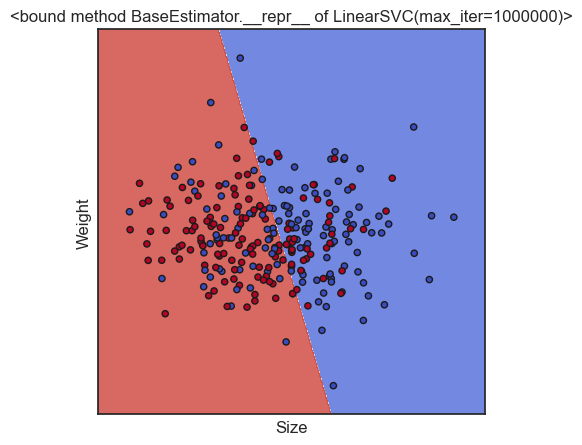

In [41]:
plot_cl(LinearSVC(C=1.0, max_iter=1000000))

c:\Users\icosane\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


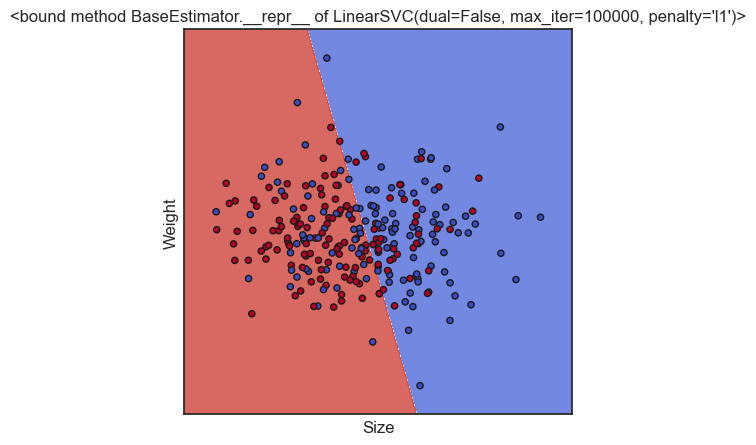

In [42]:
plot_cl(LinearSVC(C=1.0, penalty='l1', dual=False, max_iter=100000))

c:\Users\icosane\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


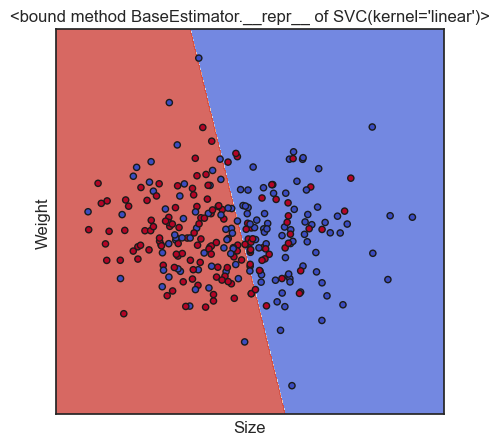

In [43]:
plot_cl(SVC(kernel='linear'))

c:\Users\icosane\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but NuSVC was fitted with feature names
  warnings.warn(


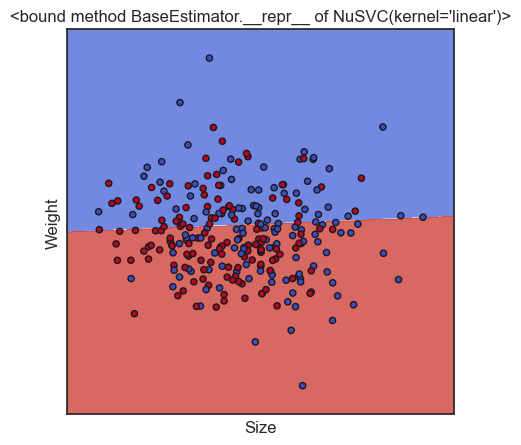

In [44]:
plot_cl(NuSVC(kernel='linear'))

c:\Users\icosane\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


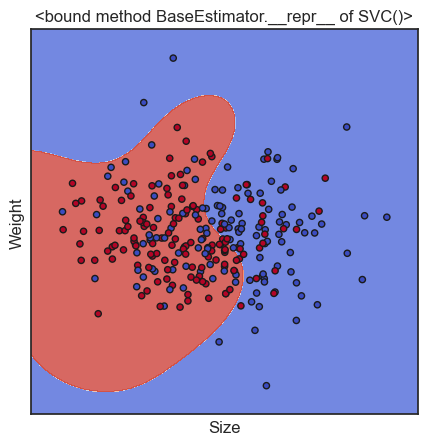

In [45]:
plot_cl(SVC(kernel='rbf'))

c:\Users\icosane\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


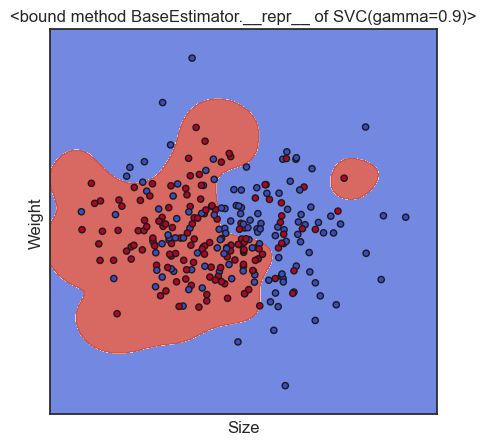

In [46]:
plot_cl(SVC(kernel='rbf', gamma=0.9, C=1.0))

c:\Users\icosane\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


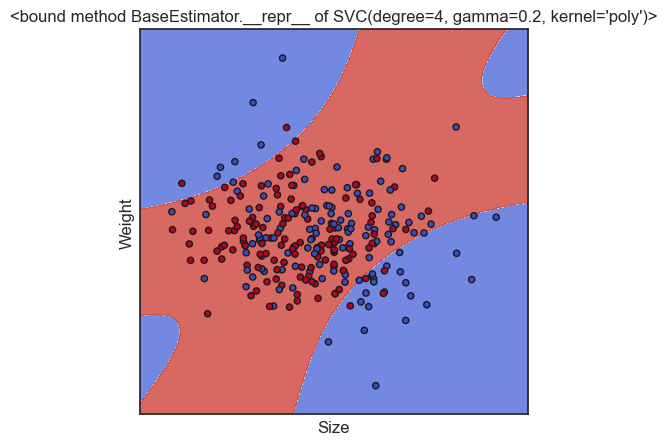

In [47]:
plot_cl(SVC(kernel='poly', degree=4, gamma=0.2, C=1.0))

c:\Users\icosane\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


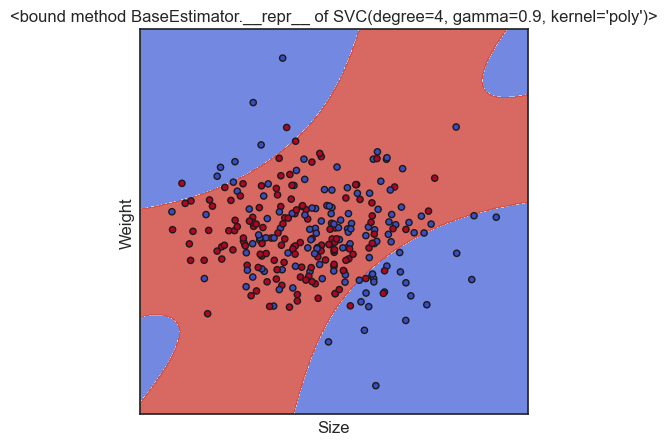

In [48]:
plot_cl(SVC(kernel='poly', degree=4, gamma=0.9, C=1.0))